 # Power Load Prediction for West Zone - GRU Model

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [2]:
power_data_west = pd.read_csv("west_interval_data_01-29-2019_01-27-2021.csv")

In [3]:
power_data_west['End Date Time'] = pd.to_datetime(power_data_west['End Date Time'], infer_datetime_format=True)
indexedDataset = power_data_west.set_index(['End Date Time'])

In [4]:
plot_df_west = pd.DataFrame(power_data_west, columns=['Peak Demand', 'Avg. Temperature', 'End Date Time'])

In [5]:
plot_df_west['End Date Time'].min()

Timestamp('2019-01-29 00:15:00')

In [6]:
plot_df_west['End Date Time'].max()

Timestamp('2022-01-27 00:00:00')

In [7]:
power_data_west['month'] = power_data_west['End Date Time'].dt.strftime('%b')

In [8]:
power_data_west['day_of_week'] = power_data_west['End Date Time'].dt.day_name()

In [9]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

date_range = pd.date_range(start='2019-01-01', end='2022-01-27')

cal = calendar()
holidays = cal.holidays(start=date_range.min(), end=date_range.max())

power_data_west['holiday'] = power_data_west['End Date Time'].dt.date.astype('datetime64').isin(holidays)

In [10]:
power_data_west.head(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
0,west,1/29/19 0:00,2019-01-29 00:15:00,211.2,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,844.8,KW,Jan,Tuesday,False
1,west,1/29/19 0:15,2019-01-29 00:30:00,210.4,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,841.6,KW,Jan,Tuesday,False
2,west,1/29/19 0:30,2019-01-29 00:45:00,208.0,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,832.0,KW,Jan,Tuesday,False
3,west,1/29/19 0:45,2019-01-29 01:00:00,212.0,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,848.0,KW,Jan,Tuesday,False
4,west,1/29/19 1:00,2019-01-29 01:15:00,203.2,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,812.8,KW,Jan,Tuesday,False
5,west,1/29/19 1:15,2019-01-29 01:30:00,205.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,822.4,KW,Jan,Tuesday,False
6,west,1/29/19 1:30,2019-01-29 01:45:00,205.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,822.4,KW,Jan,Tuesday,False
7,west,1/29/19 1:45,2019-01-29 02:00:00,208.8,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,835.2,KW,Jan,Tuesday,False
8,west,1/29/19 2:00,2019-01-29 02:15:00,217.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,870.4,KW,Jan,Tuesday,False
9,west,1/29/19 2:15,2019-01-29 02:30:00,229.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,918.4,KW,Jan,Tuesday,False


In [11]:
power_data_west.tail(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
104726,west,1/26/22 21:30,2022-01-26 21:45:00,284.0,KWH,NaN,NaN,52.0,FAHRENHEIT,NaN,1136.0,KW,Jan,Wednesday,False
104727,west,1/26/22 21:45,2022-01-26 22:00:00,288.8,KWH,NaN,NaN,52.0,FAHRENHEIT,NaN,1155.2,KW,Jan,Wednesday,False
104728,west,1/26/22 22:00,2022-01-26 22:15:00,301.6,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1206.4,KW,Jan,Wednesday,False
104729,west,1/26/22 22:15,2022-01-26 22:30:00,280.0,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1120.0,KW,Jan,Wednesday,False
104730,west,1/26/22 22:30,2022-01-26 22:45:00,296.8,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1187.2,KW,Jan,Wednesday,False
104731,west,1/26/22 22:45,2022-01-26 23:00:00,282.4,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1129.6,KW,Jan,Wednesday,False
104732,west,1/26/22 23:00,2022-01-26 23:15:00,288.8,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1155.2,KW,Jan,Wednesday,False
104733,west,1/26/22 23:15,2022-01-26 23:30:00,289.6,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1158.4,KW,Jan,Wednesday,False
104734,west,1/26/22 23:30,2022-01-26 23:45:00,294.4,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1177.6,KW,Jan,Wednesday,False
104735,west,1/26/22 23:45,2022-01-27 00:00:00,290.4,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1161.6,KW,Jan,Thursday,False


In [12]:
power_data_west.describe()

,Usage,Cost,Currency Unit,Avg. Temperature,Peak Demand
count,104724.000000,0.0,0.0,104716.000000,104724.000000
mean,309.636443,NaN,NaN,67.377211,1238.545770
std,75.557612,NaN,NaN,16.591545,302.230457
min,0.000000,NaN,NaN,29.000000,0.000000
25%,252.000000,NaN,NaN,54.000000,1008.000000
50%,308.000000,NaN,NaN,66.000000,1232.000000
75%,368.000000,NaN,NaN,79.000000,1472.000000
max,531.200000,NaN,NaN,114.000000,2124.800000


In [13]:
power_data_west.shape

(104736, 15)

In [14]:
power_data_west.dtypes

Service Agreement            object
Start Date Time              object
End Date Time        datetime64[ns]
Usage                       float64
Usage Unit                   object
Cost                        float64
Currency Unit               float64
Avg. Temperature            float64
Temperature Unit             object
Event Flags                  object
Peak Demand                 float64
Demand Unit                  object
month                        object
day_of_week                  object
holiday                        bool
dtype: object

In [15]:
#For checking missing values in dataset
power_data_west.isna().sum()

Service Agreement         0
Start Date Time           0
End Date Time             0
Usage                    12
Usage Unit               12
Cost                 104736
Currency Unit        104736
Avg. Temperature         20
Temperature Unit          0
Event Flags          104730
Peak Demand              12
Demand Unit              12
month                     0
day_of_week               0
holiday                   0
dtype: int64

In [16]:
power_data_west.fillna(method='ffill',inplace=True)
power_data_west.isna().sum()

Service Agreement         0
Start Date Time           0
End Date Time             0
Usage                     0
Usage Unit                0
Cost                 104736
Currency Unit        104736
Avg. Temperature          0
Temperature Unit          0
Event Flags            3840
Peak Demand               0
Demand Unit               0
month                     0
day_of_week               0
holiday                   0
dtype: int64

In [17]:
zero_usage_df = power_data_west.loc[power_data_west['Peak Demand'] == 0]
zero_usage_df.count()

Service Agreement    50
Start Date Time      50
End Date Time        50
Usage                50
Usage Unit           50
Cost                  0
Currency Unit         0
Avg. Temperature     50
Temperature Unit     50
Event Flags          50
Peak Demand          50
Demand Unit          50
month                50
day_of_week          50
holiday              50
dtype: int64

dataset.kW.plot()

## GRU Timeseries Model

In [83]:
gru_data = power_data_west[(power_data_west['End Date Time'] > '2019-01-01') & (power_data_west['End Date Time'] < '2022-02-01')]

In [84]:
gru_data.head(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
0,west,1/29/19 0:00,2019-01-29 00:15:00,211.2,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,844.8,KW,Jan,Tuesday,False
1,west,1/29/19 0:15,2019-01-29 00:30:00,210.4,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,841.6,KW,Jan,Tuesday,False
2,west,1/29/19 0:30,2019-01-29 00:45:00,208.0,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,832.0,KW,Jan,Tuesday,False
3,west,1/29/19 0:45,2019-01-29 01:00:00,212.0,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,848.0,KW,Jan,Tuesday,False
4,west,1/29/19 1:00,2019-01-29 01:15:00,203.2,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,812.8,KW,Jan,Tuesday,False
5,west,1/29/19 1:15,2019-01-29 01:30:00,205.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,822.4,KW,Jan,Tuesday,False
6,west,1/29/19 1:30,2019-01-29 01:45:00,205.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,822.4,KW,Jan,Tuesday,False
7,west,1/29/19 1:45,2019-01-29 02:00:00,208.8,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,835.2,KW,Jan,Tuesday,False
8,west,1/29/19 2:00,2019-01-29 02:15:00,217.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,870.4,KW,Jan,Tuesday,False
9,west,1/29/19 2:15,2019-01-29 02:30:00,229.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,918.4,KW,Jan,Tuesday,False


In [85]:
gru_data.tail(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
104726,west,1/26/22 21:30,2022-01-26 21:45:00,284.0,KWH,NaN,NaN,52.0,FAHRENHEIT,Daylight Savings,1136.0,KW,Jan,Wednesday,False
104727,west,1/26/22 21:45,2022-01-26 22:00:00,288.8,KWH,NaN,NaN,52.0,FAHRENHEIT,Daylight Savings,1155.2,KW,Jan,Wednesday,False
104728,west,1/26/22 22:00,2022-01-26 22:15:00,301.6,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1206.4,KW,Jan,Wednesday,False
104729,west,1/26/22 22:15,2022-01-26 22:30:00,280.0,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1120.0,KW,Jan,Wednesday,False
104730,west,1/26/22 22:30,2022-01-26 22:45:00,296.8,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1187.2,KW,Jan,Wednesday,False
104731,west,1/26/22 22:45,2022-01-26 23:00:00,282.4,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1129.6,KW,Jan,Wednesday,False
104732,west,1/26/22 23:00,2022-01-26 23:15:00,288.8,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1155.2,KW,Jan,Wednesday,False
104733,west,1/26/22 23:15,2022-01-26 23:30:00,289.6,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1158.4,KW,Jan,Wednesday,False
104734,west,1/26/22 23:30,2022-01-26 23:45:00,294.4,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1177.6,KW,Jan,Wednesday,False
104735,west,1/26/22 23:45,2022-01-27 00:00:00,290.4,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1161.6,KW,Jan,Thursday,False


In [86]:
gru_data_mod = gru_data[['Peak Demand', 'Avg. Temperature']].copy() 

In [87]:
gru_data_mod.head(10)

,Peak Demand,Avg. Temperature
0,844.8,54.0
1,841.6,54.0
2,832.0,54.0
3,848.0,54.0
4,812.8,55.0
5,822.4,55.0
6,822.4,55.0
7,835.2,55.0
8,870.4,55.0
9,918.4,55.0


In [88]:
gru_data_mod.tail(10)

,Peak Demand,Avg. Temperature
104726,1136.0,52.0
104727,1155.2,52.0
104728,1206.4,51.0
104729,1120.0,51.0
104730,1187.2,51.0
104731,1129.6,51.0
104732,1155.2,51.0
104733,1158.4,51.0
104734,1177.6,51.0
104735,1161.6,51.0


In [89]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def trasform_to_gru_format(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# load dataset

values = gru_data_mod.values

# integer encode direction
#encoder = LabelEncoder()
#values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

scaled

array([[0.39759034, 0.29411766],
       [0.3960843 , 0.29411766],
       [0.39156625, 0.29411766],
       ...,
       [0.54518074, 0.25882354],
       [0.55421686, 0.25882354],
       [0.5466867 , 0.25882354]], dtype=float32)

In [90]:
# frame as supervised learning
gru_format = trasform_to_gru_format(scaled, 960, 1)
gru_format = gru_format.iloc[: , :-1]
print(gru_format.head())

     var1(t-960)  var2(t-960)  var1(t-959)  var2(t-959)  var1(t-958)  \
960     0.397590     0.294118     0.396084     0.294118     0.391566   
961     0.396084     0.294118     0.391566     0.294118     0.399096   
962     0.391566     0.294118     0.399096     0.294118     0.382530   
963     0.399096     0.294118     0.382530     0.305882     0.387048   
964     0.382530     0.305882     0.387048     0.305882     0.387048   

     var2(t-958)  var1(t-957)  var2(t-957)  var1(t-956)  var2(t-956)  ...  \
960     0.294118     0.399096     0.294118     0.382530     0.305882  ...   
961     0.294118     0.382530     0.305882     0.387048     0.305882  ...   
962     0.305882     0.387048     0.305882     0.387048     0.305882  ...   
963     0.305882     0.387048     0.305882     0.393072     0.305882  ...   
964     0.305882     0.393072     0.305882     0.409639     0.305882  ...   

     var2(t-5)  var1(t-4)  var2(t-4)  var1(t-3)  var2(t-3)  var1(t-2)  \
960   0.200000   0.382530   0.1

In [92]:
# split into train and test sets
values = gru_format.values
n_train_hours = 2 * 365 * 24 * 4
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
#print(train_X.shape, train_y.shape)

test_X, test_y = test[:, :-1], test[:, -1]
#print(test_X.shape, test_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 960, 2))
test_X = test_X.reshape((test_X.shape[0], 960, 2))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(70080, 960, 2) (70080,) (33696, 960, 2) (33696,)


In [93]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from pylab import rcParams
from matplotlib import rc

# design network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.GRU(200, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=100, 
                    validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/20
701/701 - 1507s - loss: 0.0203 - val_loss: 0.0155 - 1507s/epoch - 2s/step
Epoch 2/20
701/701 - 2887s - loss: 0.0141 - val_loss: 0.0150 - 2887s/epoch - 4s/step
Epoch 3/20
701/701 - 924s - loss: 0.0144 - val_loss: 0.0153 - 924s/epoch - 1s/step
Epoch 4/20
701/701 - 6827s - loss: 0.0141 - val_loss: 0.0151 - 6827s/epoch - 10s/step
Epoch 5/20
701/701 - 20998s - loss: 0.0140 - val_loss: 0.0153 - 20998s/epoch - 30s/step
Epoch 6/20
701/701 - 6108s - loss: 0.0139 - val_loss: 0.0151 - 6108s/epoch - 9s/step
Epoch 7/20
701/701 - 6309s - loss: 0.0138 - val_loss: 0.0151 - 6309s/epoch - 9s/step
Epoch 8/20
701/701 - 901s - loss: 0.0137 - val_loss: 0.0152 - 901s/epoch - 1s/step
Epoch 9/20
701/701 - 885s - loss: 0.0136 - val_loss: 0.0158 - 885s/epoch - 1s/step
Epoch 10/20
701/701 - 1010s - loss: 0.0137 - val_loss: 0.0168 - 1010s/epoch - 1s/step
Epoch 11/20
701/701 - 2008s - loss: 0.0137 - val_loss: 0.0190 - 2008s/epoch - 3s/step
Epoch 12/20
701/701 - 34802s - loss: 0.0140 - val_loss: 0.0204 - 

KeyboardInterrupt: 

In [ ]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [63]:
model.save('./gru_model_v3')

INFO:tensorflow:Assets written to: ./gru_model_v3/assets


INFO:tensorflow:Assets written to: ./gru_model_v3/assets


In [64]:
# make a prediction
print('Running Prediction')
y_pred = model.predict(test_X)
print('Done')

Running Prediction
Done


In [65]:
test_X = test_X.reshape((test_X.shape[0], 960*2))

In [66]:
y_pred.shape

(33696, 1)

In [67]:
temp = test_X[:, -1:]
temp.shape

(33696, 1)

In [68]:
from numpy import concatenate
# invert scaling for forecast
inv_y_pred = concatenate((y_pred, test_X[:, -1:]), axis=1)
inv_y_pred=  scaler.inverse_transform(inv_y_pred)
inv_y_pred = inv_y_pred[:,0]
inv_y_pred

array([1285.8   , 1332.2015, 1341.1293, ..., 1159.1282, 1153.1827,
       1172.2551], dtype=float32)

In [69]:
y_pred.shape

(33696, 1)

In [70]:
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]


In [71]:
inv_y_pred.shape

(33696,)

In [72]:
inv_y_pred

array([1285.8   , 1332.2015, 1341.1293, ..., 1159.1282, 1153.1827,
       1172.2551], dtype=float32)

In [73]:
inv_y.shape

(33696,)

In [74]:
inv_y

array([1340.8, 1350.4, 1328. , ..., 1158.4, 1177.6, 1161.6], dtype=float32)

In [45]:
# invert scaling for actual
train_X = train_X.reshape((train_X.shape[0], 96*2))

train_y = train_y.reshape((len(train_y), 1))
inv_train_y = concatenate((train_y, train_X[:, -1:]), axis=1)
inv_train_y = scaler.inverse_transform(inv_train_y)
inv_train_y = inv_train_y[:,0]
inv_train_y.shape

(70080,)

In [75]:
final_df = pd.concat([pd.DataFrame(inv_y, columns = ['Actual Peak Demand']), pd.DataFrame(inv_y_pred, columns = ['Predicted Peak Demand'])], axis=1)
final_df

,Actual Peak Demand,Predicted Peak Demand
0,1340.800049,1285.800049
1,1350.400024,1332.201538
2,1328.000000,1341.129272
3,1302.400024,1329.496704
4,1264.000000,1311.820801
...,...,...
33691,1129.599976,1185.310425
33692,1155.199951,1131.035400
33693,1158.400024,1159.128174
33694,1177.599976,1153.182739


In [76]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import mean_squared_error



def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_absolute_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred)))

def mse_error(y_true, y_pred): 
    return mean_squared_error(y_true, y_pred, squared=True)

def rmse_error(y_true, y_pred): 
    return mean_squared_error(y_true, y_pred, squared=False)

In [77]:
mean_absolute_error_var = mean_absolute_error(final_df['Actual Peak Demand'], final_df['Predicted Peak Demand'])
mean_absolute_percentage_error_var = mean_absolute_percentage_error(final_df['Actual Peak Demand'], final_df['Predicted Peak Demand'])
mse_error_var = mse_error(final_df['Actual Peak Demand'], final_df['Predicted Peak Demand'])
rmse_error_var = rmse_error(final_df['Actual Peak Demand'], final_df['Predicted Peak Demand'])

In [78]:
print('Test Set Metrics')
print('MAPE: ' , mean_absolute_percentage_error_var)
print('MAE: ', mean_absolute_error_var)
print('MSE: ', mse_error_var)
print('RMSE: ', rmse_error_var)

Test Set Metrics
MAPE:  inf
MAE:  34.353584
MSE:  2586.0046
RMSE:  50.852776


<AxesSubplot:>

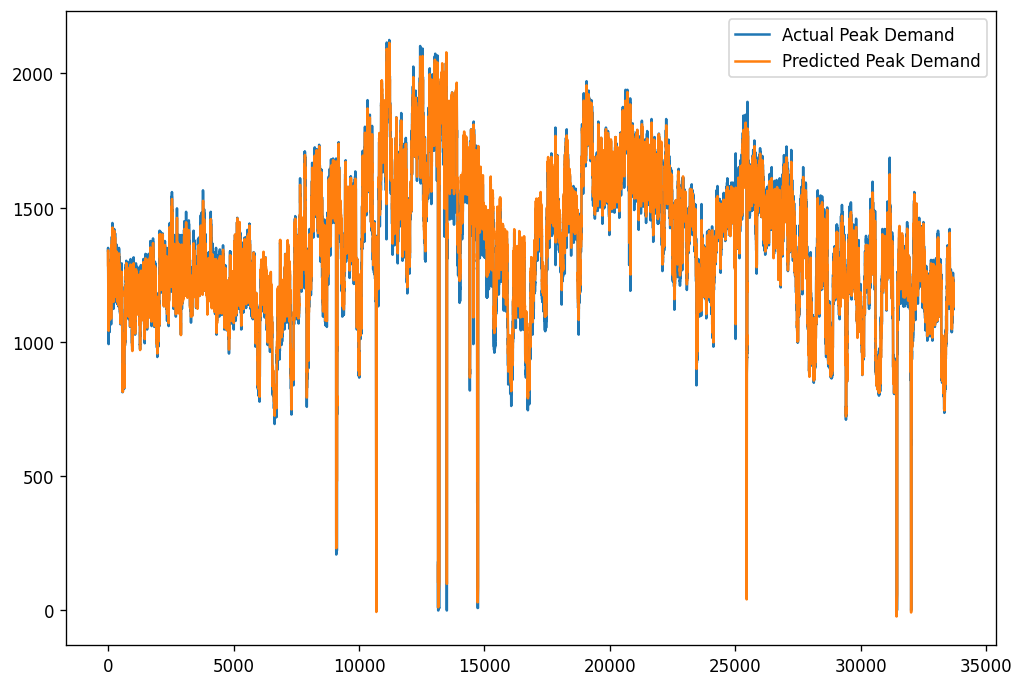

In [79]:
final_df.plot()

<AxesSubplot:>

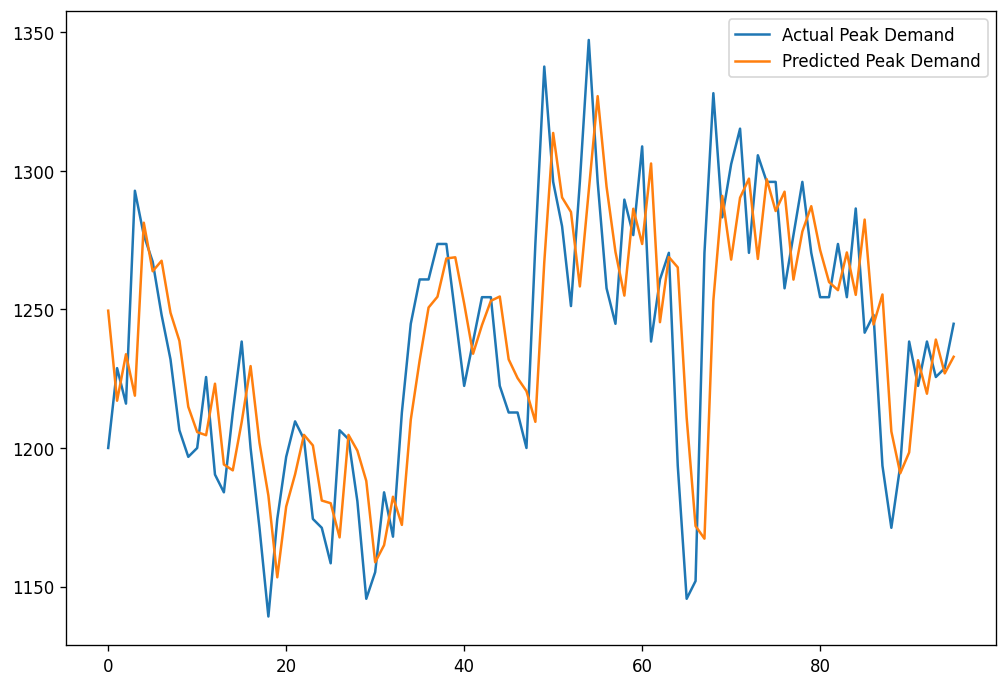

In [52]:
final_df.head(96).plot()

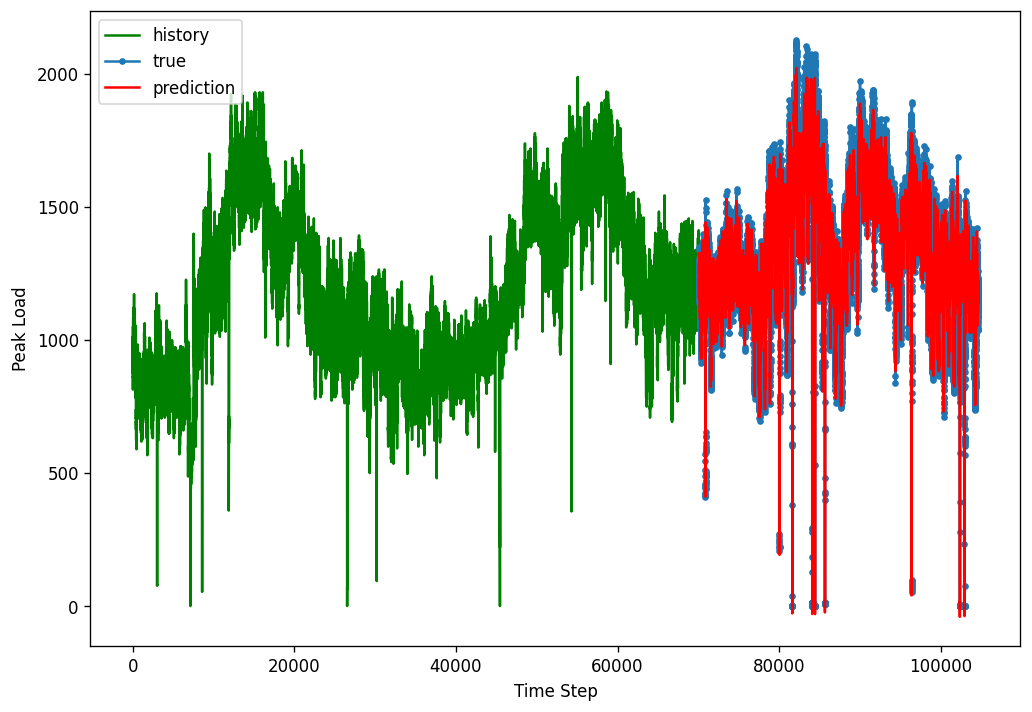

In [51]:
plt.plot(np.arange(0, len(inv_train_y)), inv_train_y, 'g', label="history")
plt.plot(np.arange(len(inv_train_y),  len(inv_train_y) + len(inv_y)), inv_y, marker='.', label="true")
plt.plot(np.arange(len(inv_train_y),  len(inv_train_y) + len(inv_y)), inv_y_pred, 'r', label="prediction")
plt.ylabel('Peak Load')
plt.xlabel('Time Step')
plt.legend()
plt.show();